<a href="https://colab.research.google.com/github/ashleydelarm/Capstone/blob/main/CapstoneASL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project, I will be training convolutional neural networks for image recognition of hands making American Sign Language gestures - specifically fingerspelling of the letters A-Z - in an attempt to recognize and relay what letter is being signed. To do this, I will lead in the data, break it into trainng and testing sets, and create several CNNs to train the data for the image recognition. I will then. determine which model is the most acccurate and successful. 

Importing all of the necessary packages. If I need to import another package later in the project, I will put it in the below code block 

In [ ]:
df = od.download("https://www.kaggle.com/ayuraj/american-sign-language-dataset")

Skipping, found downloaded files in "./american-sign-language-dataset" (use force=True to force download)


Not sure how to actually use code by taking it directly from the Kaggle API, so I'll download it throught Drive here as well

In [2]:
from google.colab import drive
import pandas
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [4]:
import keras
import tensorflow 
print ("TensorFlow version: " + tensorflow.__version__)
print ("Keras version: " + keras.__version__)

TensorFlow version: 2.6.0
Keras version: 2.6.0


In [5]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
#import keras
import sys
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import sys

In [7]:
# dimensions of our images.
img_width = 200
img_height = 200

#the directories where our train and test data is
train_data_dir = '/content/drive/MyDrive/ColabNotebooks/asl/asl_alphabet_train/asl_alphabet_train' #2000 images
test_data_dir = '/content/drive/MyDrive/ColabNotebooks/asl/asl_alphabet_test/asl_alphabet_test'   #400 images

#we will feed the training images to the neural network
#in batches of 32 images at a time so we don't have 
#to load the entire data set into memory
batch_size = 32

In [8]:
# used to rescale the pixel values from [0, 255] to between 0 and 1
datagen = ImageDataGenerator(rescale=1.0/255.0)

#These will look for our training and testing data
#in their respective directory, and it will figure out
#the class of each example based on the subfolder it is in
train_data = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

test_data = datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Found 78000 images belonging to 26 classes.
Found 26 images belonging to 26 classes.


600 images of each letter in testing 

Potential issue could be that there is only one test image per letter of the alphabet. This probably won't show if there is accuracy or not since there is only one test case 

In [9]:
print(train_data_dir)

/content/drive/MyDrive/ColabNotebooks/asl/asl_alphabet_train/asl_alphabet_train


In [10]:
path = '/content/drive/MyDrive/ColabNotebooks/asl/asl_alphabet_train/asl_alphabet_train/A/A1.jpg'

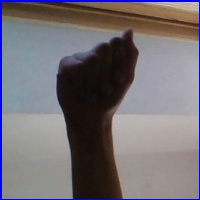

In [15]:
#import Image
from IPython.display import Image
Image(path)
